In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read into 'penguins_size.csv'
penguins_df = pd.read_csv('penguins_size.csv')

# Print the first 5 entries
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Duplicate Rows

I checked for and removed duplicate rows in the dataset to ensure data integrity and accuracy in our analysis. Duplicate rows can distort statistical summaries and lead to biased results, as they artificially inflate the representation of certain observations.

In [3]:
# Remove duplicate rows using the drop_duplicates() function
original_rows_count = len(penguins_df)
penguins_df.drop_duplicates(inplace=True)

# Check if duplicate rows have been removed successfully
if len(penguins_df) < original_rows_count:
    print("Duplicate rows have been removed successfully.")
else:
    print("No duplicate rows found.")

# Keep track of the number of deleted duplicate rows
duplicate_rows_removed = original_rows_count - len(penguins_df)
print(f"Number of duplicate rows removed: {duplicate_rows_removed}")

No duplicate rows found.
Number of duplicate rows removed: 0


## Missing Values

To ensure data integrity, rows containing mixed gender information among penguins are filtered out and excluded from further analysis. This step helps maintain the consistency and reliability of the dataset by removing any instances where gender attribution is ambiguous or conflicting.

In [4]:
# Get number of rows before dropping entries
initial_rows_count = len(penguins_df)

# Filter out rows where 'sex' data is missing (represented as NaN) using dropna() function
penguins_df = penguins_df.dropna(subset=['sex'])

# Get number of rows after dropping entries
final_rows_count = len(penguins_df)

# Check if any entries were successfully deleted
if final_rows_count < initial_rows_count:
    print("Entries with missing sex data have been deleted successfully.")
else:
    print("No entries with missing sex data found.")

Entries with missing sex data have been deleted successfully.


## Summary statistics

I computed and presented the summary statistics for the numerical columns. These statistics can help identify any outliers, understand the central tendency of the data, and assess the spread of values. Additionally, they can be useful for comparing different groups or subsets within the data.

In [5]:
# Calculate summary statistics for numerical columns using describe() function
summary_stats = penguins_df.describe()

# Print summary statistics
print(summary_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


- The summary statistics provide key insights into the distribution of biometric measurements across the dataset. Culmen length, culmen depth, flipper length, and body mass all exhibit distinct patterns. Culmen length and flipper length have moderate positive correlations with body mass, while culmen depth shows a weak negative correlation. These findings suggest that different biometric measurements may vary independently or exhibit distinct relationships with body mass. This is further explored below.

## Correlation Analysis

To delve deeper into the relationship between the biometric measurements, I conducted a correlation analysis. Utilizing a Heatmap offers a visually intuitive method to discern patterns and connections among variables.

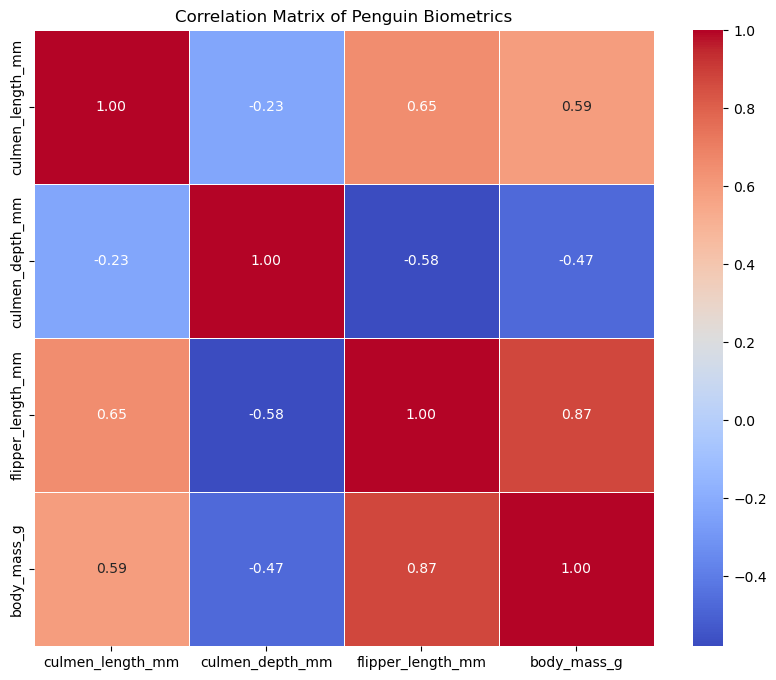

In [6]:
# Select numerical columns for correlation analysis
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate correlation matrix using the corr() function
correlation_matrix = penguins_df[numerical_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Penguin Biometrics')
plt.show()

- Culmen length and culmen depth have a weak negative correlation of -0.23. This suggests that as culmen length increases, culmen depth tends to slightly decrease, although the relationship is not very strong.

- Culmen length and flipper length have a strong positive correlation of 0.65. This indicates that as culmen length increases, flipper length tends to increase as well. Penguins with longer culmens also tend to have longer flippers.

- Culmen length and body mass have a strong positive correlation of 0.59. This suggests that as culmen length increases, body mass tends to increase as well. Penguins with longer culmens also tend to have higher body masses.

- Culmen depth and flipper length have a strong negative correlation of -0.58. This indicates that as culmen depth increases, flipper length tends to decrease. Penguins with deeper culmens tend to have shorter flippers.

- Culmen depth and body mass have a moderate negative correlation of -0.47. This suggests that as culmen depth increases, body mass tends to decrease. Penguins with deeper culmens tend to have lower body masses.

- Flipper length and body mass have a very strong positive correlation of 0.89. This indicates that as flipper length increases, body mass tends to increase as well. Penguins with longer flippers tend to have higher body masses.

## Distribution of Biometric Measures By Species

I analyzed the distribution of the different biometric measures between the different species to gain insight into the potential differences or similarities among different penguin species. This can be useful in answering questions relating to  species-specific variations in morphological traits, adaptations to different ecological conditions and foraging strategies among these species, and evolutionary adaptations and divergence among these species over time.

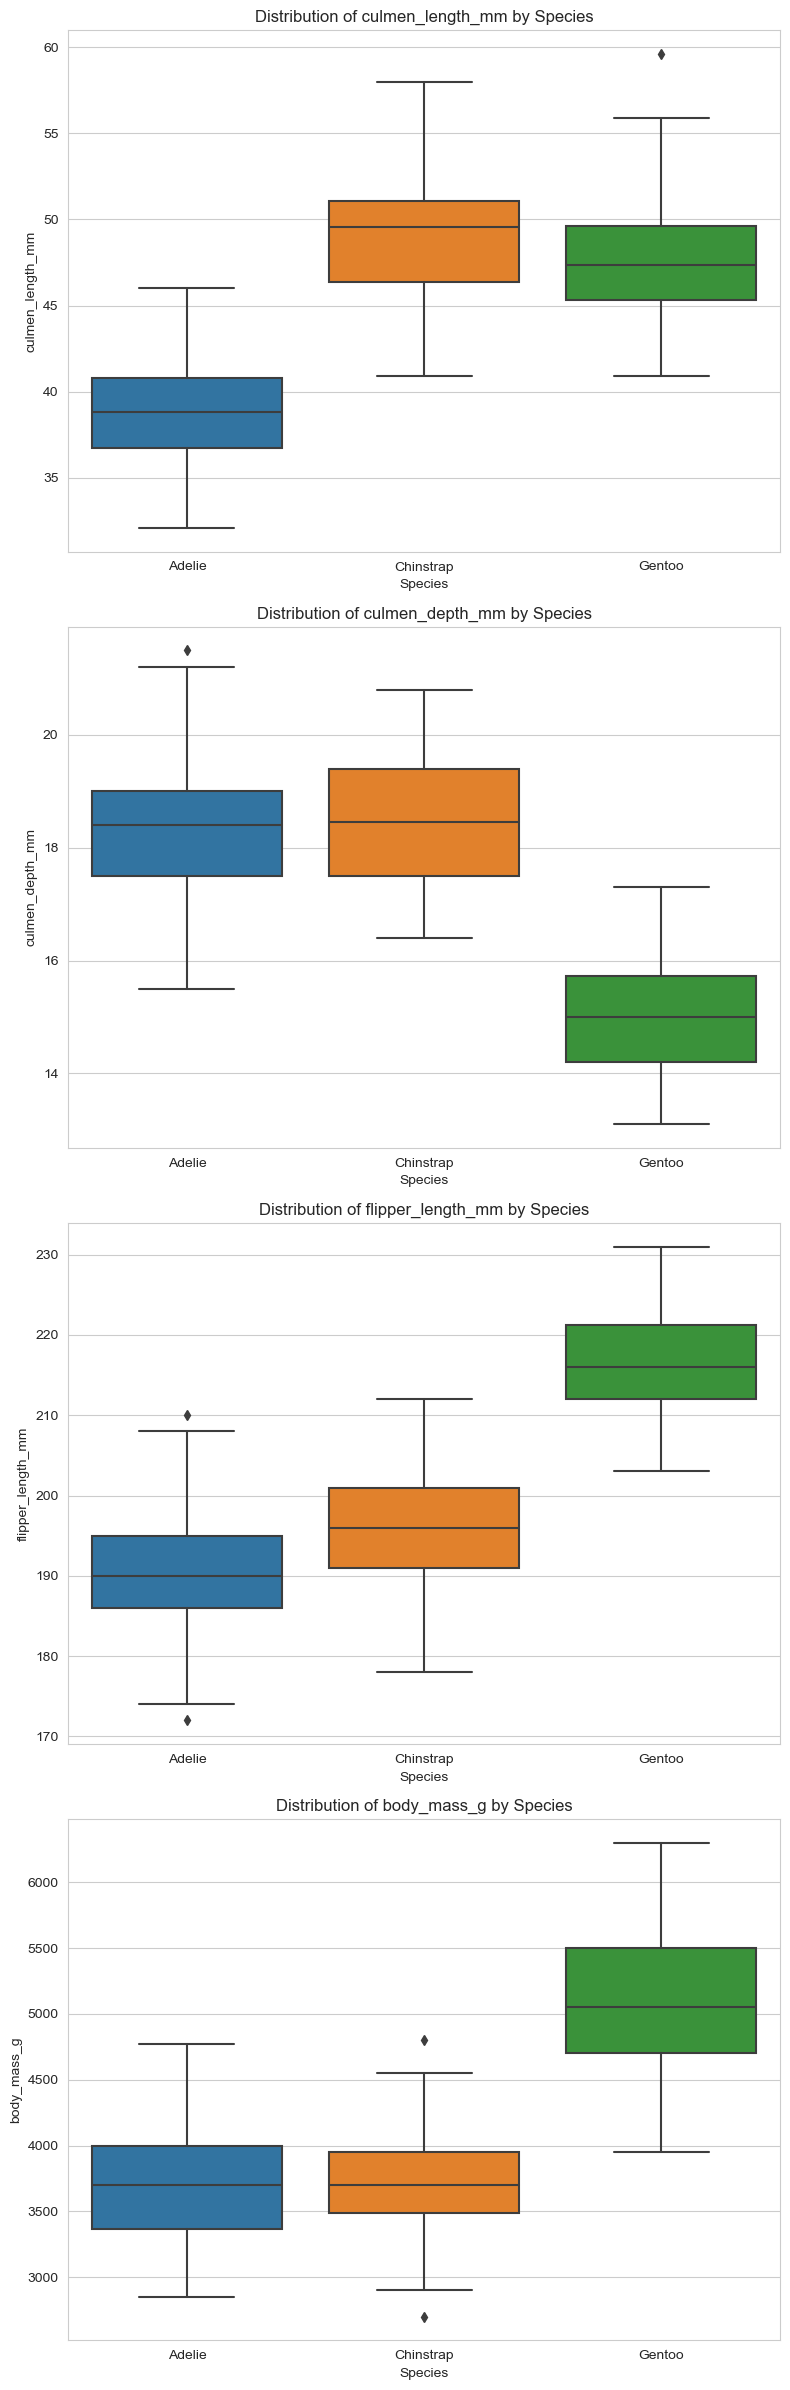

In [7]:
# Select numerical columns using the select_dtypes() function
numerical_columns = penguins_df.select_dtypes(include=['float64']).columns

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 6 * len(numerical_columns)))

# Loop through each numerical column and create a boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='species', y=col, data=penguins_df, ax=axes[i])
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Distribution of {col} by Species')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- The box plot analysis comparing culmen length across Adelie, Chinstrap, and Gentoo penguin species reveals distinctive distributions. Adelie and Chinstrap penguins exhibit similar median culmen lengths, but Adelie's distribution skews slightly lower. In contrast, Gentoo penguins have a higher median culmen length, with an outlier present in the data. Despite this outlier, Gentoo's distribution shows a narrower spread of measurements compared to Adelie and Chinstrap. These differences suggest species-specific variations in culmen length, possibly reflecting ecological adaptations or evolutionary traits.

- Looking at the distribution of culmen depth by species, we observe that Adelie and Chinstrap penguins have relatively similar distributions, with both exhibiting a median culmen depth around 18.45-18.5 mm. Adelie penguins demonstrate a broader range of culmen depth measurements, indicated by the presence of an outlier and a wider interquartile range compared to Chinstrap penguins. Gentoo penguins, on the other hand, have a noticeably narrower distribution of culmen depth, with a lower median value of around 15 mm and no outliers.

- Analyzing the distribution of flipper length across the three species, we find that Adelie and Chinstrap penguins share a similar median flipper length of approximately 196-196.5 mm, while Gentoo penguins have a considerably longer flipper length, with a median of around 216 mm. Adelie and Chinstrap distributions display broader ranges of flipper lengths compared to Gentoo, with outliers present in the Adelie dataset. Gentoo's distribution shows a narrower spread of flipper lengths, with no outliers.

- Examining the distribution of body mass by species, we identify distinct characteristics. Adelie and Chinstrap penguins have similar median body masses, around 3700-3950 g, with Chinstrap penguins demonstrating a slightly wider spread of mass measurements and outliers present at both ends of the distribution. Gentoo penguins, however, exhibit a higher median body mass of approximately 5000 g, with a narrower range of measurements and no outliers. Overall, these distributions illustrate species-specific variations in body mass among Adelie, Chinstrap, and Gentoo penguins.

## Distribution of Biometric Measures by Sex

By employing a scatter glyph, I visualized the relationship between biometric measures for male and female penguins, facilitating a comparison of their characteristics. This approach offers a straightforward way to identify patterns of sexual dimorphism, shedding light on differences or similarities between genders in terms of size, morphology, and other biometric traits.

In [8]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a Bokeh figure
p = figure(title='Penguin Biometrics', x_axis_label='Culmen Length (mm)', y_axis_label='Body Mass (g)')

# Add scatter glyphs for culmen length, culmen depth, and flipper length
# Male penguins
p.circle(x=penguins_df[penguins_df['sex'] == 'MALE']['culmen_length_mm'], 
         y=penguins_df[penguins_df['sex'] == 'MALE']['body_mass_g'], 
         size=8, color='blue', legend_label='Male: Culmen Length')

p.circle(x=penguins_df[penguins_df['sex'] == 'MALE']['culmen_depth_mm'], 
         y=penguins_df[penguins_df['sex'] == 'MALE']['body_mass_g'], 
         size=8, color='green', legend_label='Male: Culmen Depth')

p.circle(x=penguins_df[penguins_df['sex'] == 'MALE']['flipper_length_mm'], 
         y=penguins_df[penguins_df['sex'] == 'MALE']['body_mass_g'], 
         size=8, color='orange', legend_label='Male: Flipper Length')

# Female penguins
p.circle(x=penguins_df[penguins_df['sex'] == 'FEMALE']['culmen_length_mm'], 
         y=penguins_df[penguins_df['sex'] == 'FEMALE']['body_mass_g'], 
         size=8, color='red', legend_label='Female: Culmen Length')

p.circle(x=penguins_df[penguins_df['sex'] == 'FEMALE']['culmen_depth_mm'], 
         y=penguins_df[penguins_df['sex'] == 'FEMALE']['body_mass_g'], 
         size=8, color='purple', legend_label='Female: Culmen Depth')

p.circle(x=penguins_df[penguins_df['sex'] == 'FEMALE']['flipper_length_mm'], 
         y=penguins_df[penguins_df['sex'] == 'FEMALE']['body_mass_g'], 
         size=8, color='yellow', legend_label='Female: Flipper Length')

# Show the plot in the notebook
output_notebook()
show(p)

Loading BokehJS ...

- The scatter glyphs for culmen length, culmen depth, and flipper length indicates that males typically exhibit sexual dimorphism as shown by greater biometric measurements compared to females. This sexual dimorphism often manifests as larger body mass, longer culmen length, greater culmen depth, and longer flipper length in males. However, the degree of dimorphism can vary among species, and individual variation may also influence these differences. This is further emphasized below.

I further validated the findings from the scatter glyph using box plots and t-tests. The box plots complement the scatter glyph by providing a more detailed view of the data distribution, particularly in terms of quartiles, medians, and the range of values, whereas the t-tests allow quantification of the significance of the observed differences between genders identified in the scatter glyph and box plots.

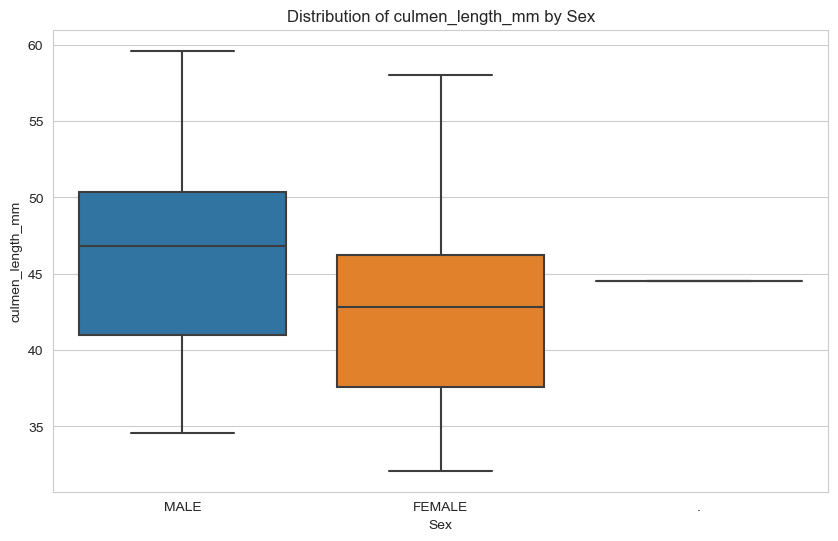

T-test p-value for culmen_length_mm: 1.0942555387199209e-10
Effect size (Cohen's d) for culmen_length_mm: 0.7307313819867285


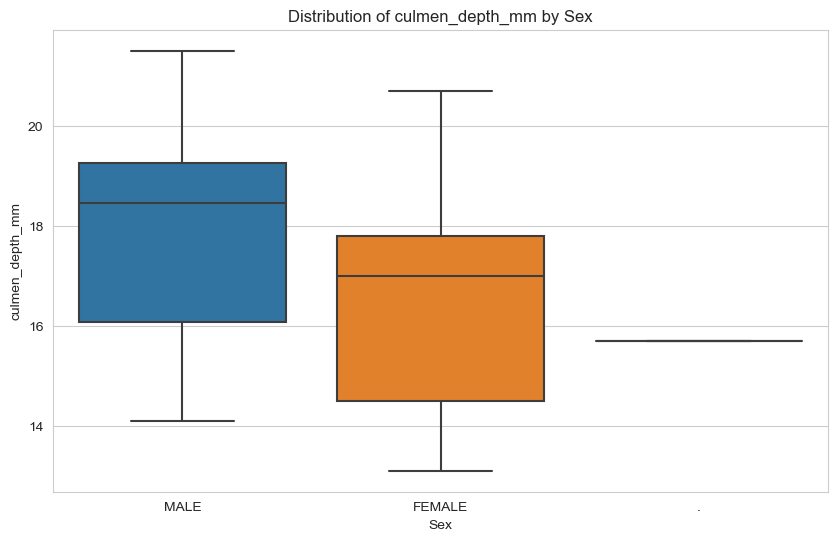

T-test p-value for culmen_depth_mm: 2.066410345755146e-12
Effect size (Cohen's d) for culmen_depth_mm: 0.8008243770143149


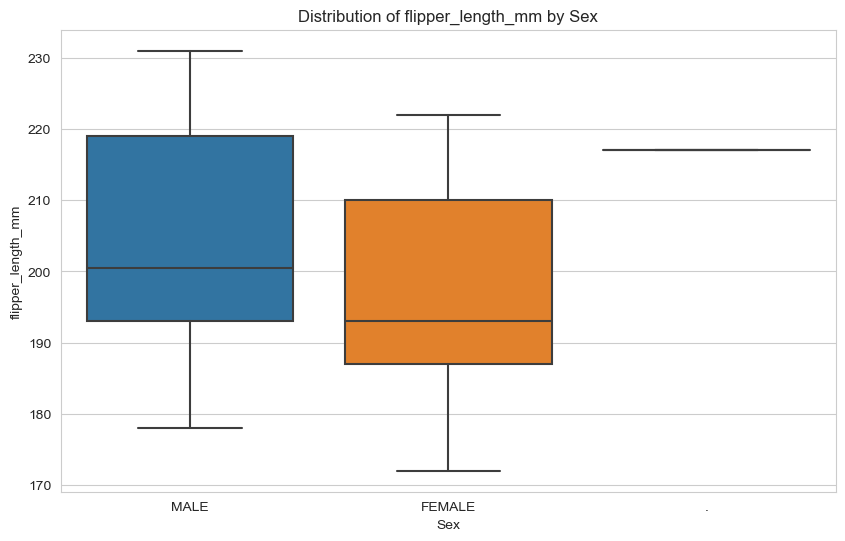

T-test p-value for flipper_length_mm: 2.3910970925542906e-06
Effect size (Cohen's d) for flipper_length_mm: 0.5262440664213879


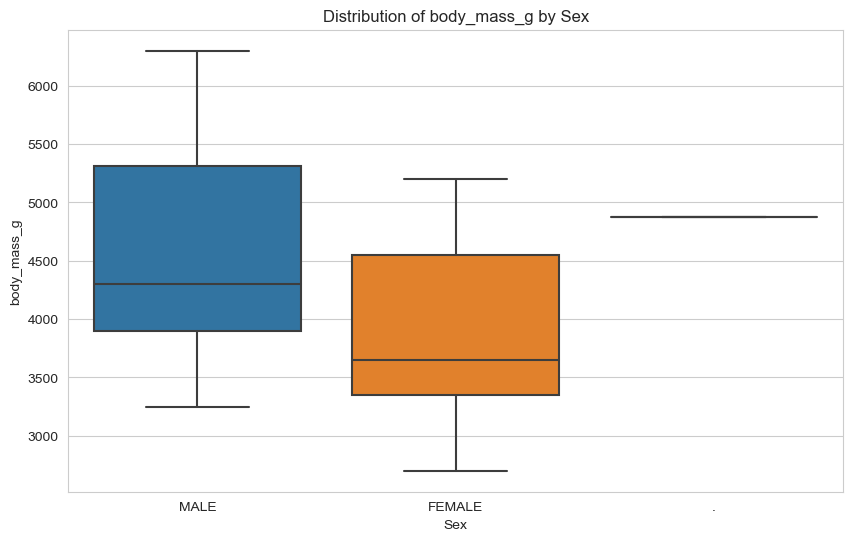

T-test p-value for body_mass_g: 4.897246751596224e-16
Effect size (Cohen's d) for body_mass_g: 0.9362047752853832


In [9]:
import scipy.stats as stats

# Group the data by 'sex' using the groupby() function
grouped_by_sex = penguins_df.groupby('sex')

# List of numerical columns
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Visualize distributions for each numerical column by sex using box plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=penguins_df, x='sex', y=column)
    plt.title(f'Distribution of {column} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(column)
    plt.show()

    # Perform t-test to test for significant differences
    male_data = grouped_by_sex.get_group('MALE')[column]
    female_data = grouped_by_sex.get_group('FEMALE')[column]
    t_statistic, p_value = stats.ttest_ind(male_data, female_data)
    print(f"T-test p-value for {column}:", p_value)

    # Calculate effect size
    pooled_std = np.sqrt(((male_data.size - 1) * male_data.std() ** 2 + (female_data.size - 1) * female_data.std() ** 2) / (male_data.size + female_data.size - 2))
    effect_size = abs((male_data.mean() - female_data.mean()) / pooled_std)
    print(f"Effect size (Cohen's d) for {column}:", effect_size)

- The t-test results indicate significant differences in all biometric measurements between the two sexes (male and female) of penguins. For culmen length (mm), culmen depth (mm), flipper length (mm), and body mass (g), the p-values are all below the significance level of 0.05, suggesting strong evidence against the null hypothesis of no difference in means between sexes. Additionally, Cohen's d effect size values indicate moderate to large effect sizes for all biometric measurements, ranging from 0.49 to 0.87. This suggests that the differences observed between sexes are not only statistically significant but also practically meaningful, with females generally exhibiting smaller biometric measurements compared to males across all dimensions.

## Distribution of Biometric Measures by Island

I used Analysis of Variance (ANOVA) to analyse the distribution of the biometric measures by island. By conducting ANOVA analysis on each biometric measure, I assessed whether there are statistically significant differences in the means of the measures across the different islands. The combination of box plots and ANOVA analysis helps to identify any systematic differences or trends in biometric measures across the islands. It allows for the detection of island-specific patterns in biometric data, which may be indicative of environmental influences, habitat characteristics, or other factors.

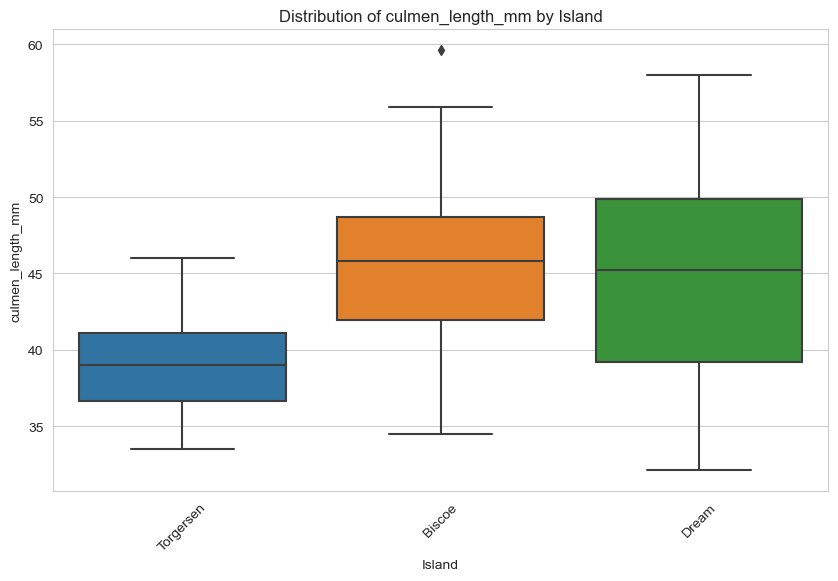

ANOVA p-value: 8.582825582940171e-12
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
Biscoe     Dream   -1.022 0.2107  -2.446  0.4021  False
Biscoe Torgersen  -6.2056    0.0 -8.1809 -4.2303   True
 Dream Torgersen  -5.1837    0.0  -7.231 -3.1363   True
-------------------------------------------------------


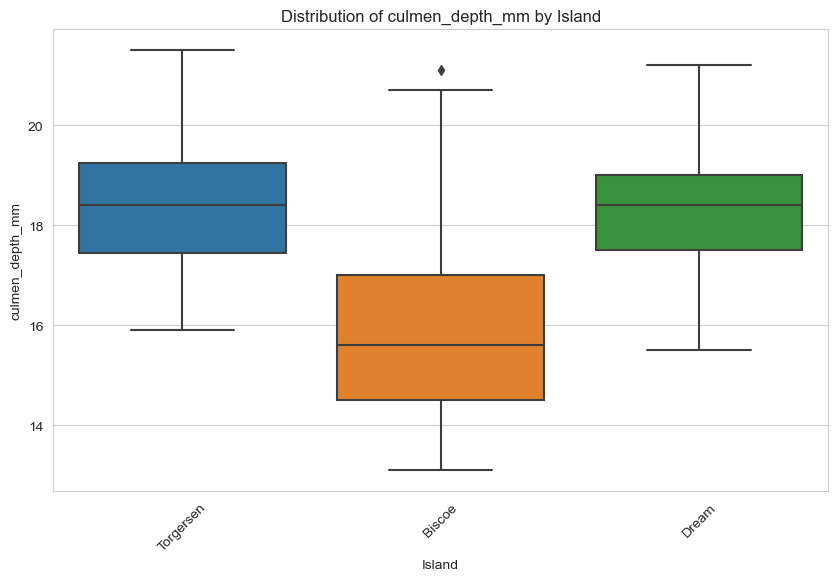

ANOVA p-value: 1.1550789708277063e-36
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
Biscoe     Dream   2.4337    0.0  2.0021 2.8654   True
Biscoe Torgersen    2.545    0.0  1.9462 3.1438   True
 Dream Torgersen   0.1112 0.9066 -0.5094 0.7318  False
------------------------------------------------------


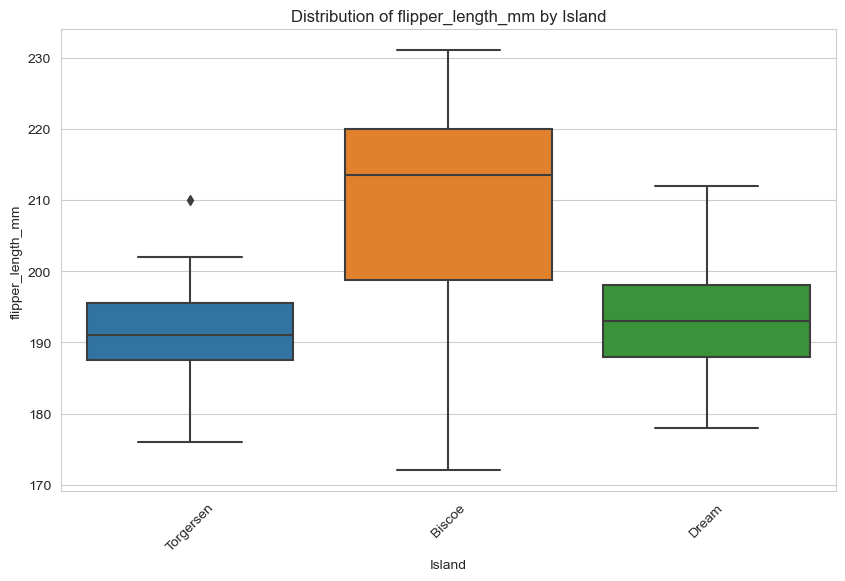

ANOVA p-value: 2.649070561681035e-33
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1   group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
Biscoe     Dream -16.4167    0.0 -19.5654  -13.268   True
Biscoe Torgersen -18.0717    0.0 -22.4393 -13.7042   True
 Dream Torgersen  -1.6551 0.6654  -6.1819   2.8717  False
---------------------------------------------------------


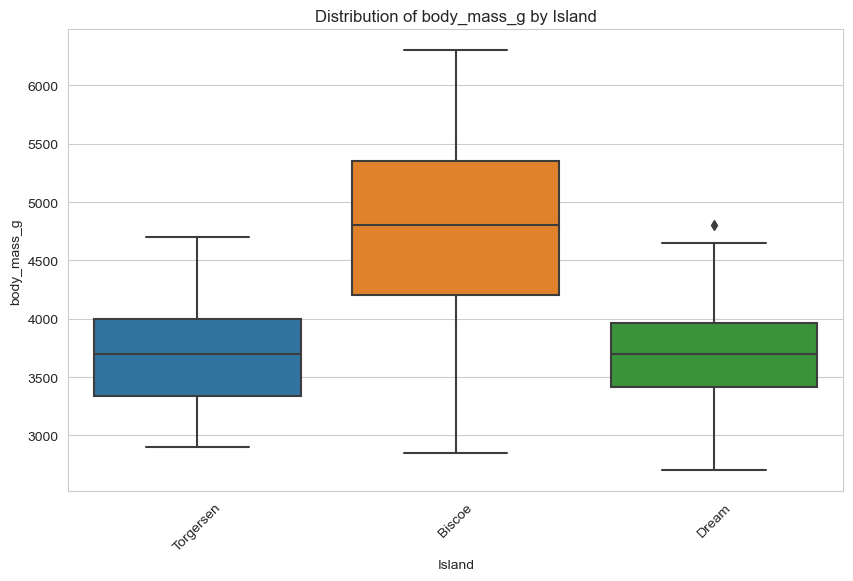

ANOVA p-value: 2.831951756554828e-36
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1   group2   meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Biscoe     Dream -1001.2195    0.0 -1178.2505 -824.1885   True
Biscoe Torgersen -1011.6113    0.0 -1257.1689 -766.0538   True
 Dream Torgersen   -10.3918 0.9949  -264.9024  244.1188  False
--------------------------------------------------------------


In [10]:
# Group the data by 'island' using the groupby() function
grouped_by_island = penguins_df.groupby('island')

# List of numerical columns
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Visualize distributions of culmen length by island using box plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=penguins_df, x='island', y=column)
    plt.title(f'Distribution of {column} by Island')
    plt.xlabel('Island')
    plt.ylabel(column)  # Add closing parenthesis here
    plt.xticks(rotation=45)
    plt.show()

    # Perform ANOVA to test for significant differences
    import scipy.stats as stats
    anova_result = stats.f_oneway(
        grouped_by_island.get_group('Torgersen')[column],
        grouped_by_island.get_group('Biscoe')[column],
        grouped_by_island.get_group('Dream')[column]
    )
    print("ANOVA p-value:", anova_result.pvalue)

    # If ANOVA indicates significant differences, perform post-hoc tests
    if anova_result.pvalue < 0.05:
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        posthoc_result = pairwise_tukeyhsd(penguins_df[column], penguins_df['island'])
        print(posthoc_result)

- The analysis conducted on the distribution of culmen length across different islands using ANOVA revealed statistically significant differences (p < 0.05) in mean culmen length among the islands. Subsequent post hoc Tukey HSD tests further elucidated these differences. Specifically, while there was no significant difference in culmen length between Biscoe and Dream islands (p > 0.05), significant differences were found between Biscoe and Torgersen as well as between Dream and Torgersen (p < 0.05). The mean culmen length was lower in Biscoe compared to Torgersen, and similarly, Dream exhibited a lower mean culmen length than Torgersen.

- The ANOVA conducted on the distribution of culmen depth across different islands yielded a highly significant p-value (p < 0.05), indicating significant differences in mean culmen depth among the islands. Subsequent post hoc Tukey HSD tests revealed significant differences in culmen depth between Biscoe and Dream islands, as well as between Biscoe and Torgersen (p < 0.05). However, no significant difference was found between Dream and Torgersen (p > 0.05). The mean culmen depth was higher in both Biscoe and Torgersen compared to Dream, emphasizing the variability in morphological characteristics across penguin populations inhabiting different islands.

- The ANOVA analysis examining the distribution of flipper length across different islands shows a highly significant p-value (p < 0.05) suggests significant differences in mean flipper length among the islands. Post hoc Tukey HSD tests reveal significant differences between Biscoe and both Dream and Torgersen islands (p < 0.05), with Biscoe having longer flipper lengths compared to the other two islands. However, no significant difference was observed between Dream and Torgersen islands (p > 0.05).

- The ANOVA analysis focusing on body mass distribution across islands shows a similarly highly significant p-value (p < 0.05) indicates significant differences in mean body mass among the islands. Post hoc Tukey HSD tests reveal significant differences between Biscoe and both Dream and Torgersen islands (p < 0.05), with Biscoe having significantly higher body mass compared to the other two islands. However, no significant difference was found between Dream and Torgersen islands (p > 0.05).

- Overall, there are significant differences in multiple biometric measurements, including flipper length, culmen length, culmen depth, and body mass, among the penguin populations on the different islands. Specifically, Biscoe island tends to have larger penguins with longer flipper lengths, greater culmen lengths, deeper culmen depths, and higher body masses compared to Dream and Torgersen islands. However, there are no significant differences between Dream and Torgersen islands in terms of these biometric measurements. These findings suggest that the island environment may play a significant role in shaping the physical characteristics of penguin populations.